单源最短路（Dijkstra）
  定义：给定图中一个点s，求到任一点的最短路径
  使用场景：没有负权
  过程：见如下“算法步骤”
  实现：

图 ： 求点0到各点的最短距离
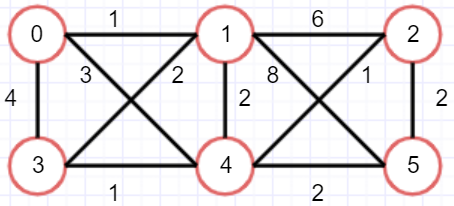

算法步骤：
第一步：
  构建邻接矩阵graph，无法相连的两点，用正无穷表示
  start_index = 0，点0作为起始点
第二步：
  建立short_path一维数组 int 初始值为0，长度为节点个数，short_path[3] = 3 表示点0到点3的最短距离为3，short_path[0] = 0 即自身的点距离为0
  建立visited_node一维数组 int 初始值为0，已访问过的node标记为1，未访问的标记为0
  建立一个
第三步：
  short_path[0] = graph[0][0]，visited_node[0] = 1
第四步：
  已存在的初始路径记作Q（起始点0->其他点:）：[0->1:1; 0->3:4; 0->4:3; 0->2:正无穷; 0->5:正无穷;]
  点0对应的‘路径：权值’集合记作S，同Q
第五步：
  遍历集合S
  找到S中start_index权值最小的点
  权值最小的点为1
  将1作为中介点，更新集合Q
  重新更新Q中，点0到各点的权值，权值=min((start_index->1 + 1->'2,3,4,5'),start_index->'2,3,4,5')
  点0对应的‘路径：权值’更新为：0->1:1; 0->1->3:3; 0->4:3; 0->1->4->2:4; 0->1->4->5:5;
  根据Q更新short_path = [0,1,4,3,4,5]
  Q中删除‘0->1:1;’
  Q为空集时，break
  则Q中，即为起始点0->其他点的最短路径值

In [14]:
import sys
#图 邻接矩阵
max_val = 10**10
graph = [
    [0,1,max_val,4,3,max_val],
    [1,0,6,2,2,8],
    [max_val,6,0,max_val,1,2],
    [4,2,max_val,0,1,max_val],
    [3,2,1,1,0,2],
    [max_val,8,2,max_val,2,0]
]
start_index = 0

def djikstra(graph,start_index):
    #节点个数
    nodes_len = len(graph)
    #最短路径值
    short_path = [0] * nodes_len
    #已访问的节点
    visited_nodes = [0] * nodes_len
    #初始化start_index
    short_path[start_index] = graph[start_index][start_index]
    visited_nodes[start_index] = 1
    
    for i in range(1,nodes_len):
        #找到距graph最近的点，即graph[start_index]值最小的点，排除自己
        nearest_node_index = -1
        nearest_node_weight = sys.maxsize
        for j in range(nodes_len):
            if visited_nodes[j] == 0 and graph[start_index][j] < nearest_node_weight:
                nearest_node_weight = graph[start_index][j]
                nearest_node_index = j
        
        #更新路径值以及已访问节点列表
        short_path[nearest_node_index] = nearest_node_weight
        visited_nodes[nearest_node_index] = 1
        
        #以nearest_node_index为中介点，更新graph[start_index]
        #为甚支更新graph[start_index]，因为求的就是start_index的最短路径，而graph[start_index][k]就是各路径的值
        for k in range(nodes_len):
            if visited_nodes[k] == 0:
                graph[start_index][k] = min(graph[start_index][k],graph[start_index][nearest_node_index]+graph[nearest_node_index][k])
    
    return short_path

short_path_res = djikstra(graph,start_index)
for i in range(len(short_path_res)):
    print(start_index,'->',i,' 最短路径值：',short_path_res[i])
    

0 -> 0  最短路径值： 0
0 -> 1  最短路径值： 1
0 -> 2  最短路径值： 4
0 -> 3  最短路径值： 3
0 -> 4  最短路径值： 3
0 -> 5  最短路径值： 5
